<a href="https://colab.research.google.com/github/citrus1998/nlp100/blob/main/nlp100_4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [37]:
!wget https://nlp100.github.io/data/neko.txt

--2022-06-25 11:08:47--  https://nlp100.github.io/data/neko.txt
Resolving nlp100.github.io (nlp100.github.io)... 185.199.108.153, 185.199.109.153, 185.199.110.153, ...
Connecting to nlp100.github.io (nlp100.github.io)|185.199.108.153|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 975789 (953K) [text/plain]
Saving to: ‘neko.txt.1’

neko.txt.1          100%[===================>] 952.92K  --.-KB/s    in 0.05s   

2022-06-25 11:08:48 (19.4 MB/s) - ‘neko.txt.1’ saved [975789/975789]



In [38]:
!apt install mecab libmecab-dev mecab-ipadic-utf8

Reading package lists... Done
Building dependency tree       
Reading state information... Done
libmecab-dev is already the newest version (0.996-5).
mecab is already the newest version (0.996-5).
mecab-ipadic-utf8 is already the newest version (2.7.0-20070801+main-1).
The following package was automatically installed and is no longer required:
  libnvidia-common-460
Use 'apt autoremove' to remove it.
0 upgraded, 0 newly installed, 0 to remove and 49 not upgraded.


In [39]:
!mecab -o ./neko.txt.mecab ./neko.txt

In [40]:
# Check the number of sentences
!wc -l ./neko.txt.mecab

226266 ./neko.txt.mecab


In [41]:
!pip install mecab-python3 unidic-lite

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


# 30. 形態素解析結果の読み込み  
形態素解析結果（neko.txt.mecab）を読み込むプログラムを実装せよ．ただし，各形態素は表層形（surface），基本形（base），品詞（pos），品詞細分類1（pos1）をキーとするマッピング型に格納し，1文を形態素（マッピング型）のリストとして表現せよ．第4章の残りの問題では，ここで作ったプログラムを活用せよ．

In [42]:
import MeCab

In [43]:
filename = './neko.txt.mecab'

sentences = []
morphs = []
with open(filename, 'r', encoding='utf-8') as f:
  for l in f:
    if l not in 'EOS\n':
      spl_l = l.split('\t')
      if spl_l[0] != '':
        spl_cxt = spl_l[1].split(',')
        spl_cxt[-1] = spl_cxt[-1].replace('\n', '')
        morph = {'surface': spl_l[0], 'base': spl_cxt[6], 'pos': spl_cxt[0], 'pos1': spl_cxt[1]}
        morphs.append(morph)
    else:
      sentences.append(morphs)
      morphs = []

sentences = sentences[:2] + [m for m in sentences[2:] if len(m) != 0]
for i, m in enumerate(sentences[2]):
  print(m)

{'surface': '\u3000', 'base': '\u3000', 'pos': '記号', 'pos1': '空白'}
{'surface': '吾輩', 'base': '吾輩', 'pos': '名詞', 'pos1': '代名詞'}
{'surface': 'は', 'base': 'は', 'pos': '助詞', 'pos1': '係助詞'}
{'surface': '猫', 'base': '猫', 'pos': '名詞', 'pos1': '一般'}
{'surface': 'で', 'base': 'だ', 'pos': '助動詞', 'pos1': '*'}
{'surface': 'ある', 'base': 'ある', 'pos': '助動詞', 'pos1': '*'}
{'surface': '。', 'base': '。', 'pos': '記号', 'pos1': '句点'}


#31.
動詞の表層形をすべて抽出せよ．

#32.
動詞の基本形をすべて抽出せよ．

#33.
2つの名詞が「の」で連結されている名詞句を抽出せよ．

#34. 名詞の連接
名詞の連接（連続して出現する名詞）を最長一致で抽出せよ．

In [44]:
def list2str(lst):
  return ''.join(lst)

In [45]:
result31 = []
result32 = []
result33 = []
result34 = []

for s in sentences:
  nouns = []
  for i, m in enumerate(s):
    if m['pos'] == '動詞':
      result31.append(m['surface'])
      result32.append(m['base'])

    if s[i]['pos'] == '名詞':
      nouns.append(m['surface']) 
    else:
      if len(nouns) == 1:
        del nouns[-1]
      else:
        result34.append(list2str(nouns))
      nouns = []

  for i in range(1, len(s) - 1):
    if s[i]['surface'] == 'の' and (s[i-1]['pos'] == '名詞' and s[i+1]['pos'] == '名詞'):
      #print(s[i-1]['surface'], s[i+1]['surface'])
      result33.append((s[i-1]['surface'], s[i+1]['surface']))
    
result31 = set(result31)
result32 = set(result32)
result33 = set(result33)
result34 = set(result34)
result34.remove('')

In [46]:
print(result31)

{'遇っ', '入り込ん', '乗ら', '散っ', '見かね', '捏ね', '仕込む', '書き流し', '擲つ', '響く', 'ととのう', '見ろ', 'もが', '及ば', '剥げる', 'いっ', '濡れ', '戻す', '書き立て', '潜ら', '嘯い', '垂れる', 'かかわる', '向き直っ', '畳ん', '吹き', '果す', '乗っ', '代っ', '観', 'かかっ', '見つけ', '依る', 'ひねくる', '集まれ', 'まします', '合わせ', '抜け出し', '貰い', '係わら', '間に合わ', '飽き飽きし', '来れ', '思い出し', '乗り越す', '反し', 'ほのめかす', 'わす', '放り出し', '明け放し', '覚し', '透かし', '拝する', '眠る', '逢い', 'うたっ', '瘠せ', '使い', '詠ん', '叫び', '渡す', 'ざれ', '破れ', '見れ', '奏し', '降る', '窺う', 'つかん', '見つかる', '仰', '捲く', 'たたく', '劣ら', '生ん', '歌っ', '売る', 'つづけ', '突っ込ん', '納まり', '増す', '取れれ', '食える', 'めさ', '飛込ん', '富ん', '踏み込む', '打ちつけ', '枉げ', 'つくし', '受ける', '働け', '貫く', '転じ', '隠れる', 'かなう', '起し', '返す', '言い付け', 'からげる', '問わ', '離れる', '覆せ', '立ち', '持つ', '傭っ', 'だまっ', 'いらせられ', '跳ねかす', '越え', '負え', '帰ら', '得ん', '律すれ', '関する', '流し', '隠す', '乗', '括り', 'やむを得ん', '揚げる', 'われ', '潰し', '差出す', '取りはずす', '極まる', '伝え', '屠ら', '差し出し', 'むく', '飛び下りる', 'しまえ', 'つかし', '求め', '溶かし', 'おき', 'もたし', '殺さ', 'たのま', '突き', '立ちすくん', '弱っ', 'あるき', '換える', '与えん', 'まかり', '当ら', '名づける', 'かこつ', 'ためし', 

In [47]:
print(result32)

{'むすぶ', '消え失せる', '取り扱う', 'ととのう', '仕込む', '響く', '擲つ', '剥げる', '戻す', '巫山戯る', '組む', '追いかける', 'かかわる', '垂れる', '尽きる', 'ふさぐ', '見下す', '果す', '押し倒す', '知らす', '与る', 'ひねくる', '依る', '突き立てる', 'まします', '片づく', '落ちつく', '乗り越す', 'ほのめかす', '拝する', '眠る', '飾り付ける', 'いがみ合う', '渡す', '引掻く', 'やり過ごす', '漬ける', '眠れる', 'つかす', '仰せる', '降る', '窺う', '糺す', '携える', '見つかる', '捲く', 'たたく', '咲く', '比する', '飽く', '惜しむ', '仰向く', '言い兼ねる', '売る', '沁みる', '打殺す', '踊る', '増す', '食える', '引込む', '踏み込む', '掻い込む', '書き散らす', '作り上げる', '受ける', '印せる', '見向く', '貫く', '力む', '覚る', '隠れる', 'かなう', '返す', 'からげる', '離れる', '持つ', '懲らしめる', '聞かす', '跳ねかす', 'いいかねる', 'ねだる', '買い込む', '入り込む', '関する', '隠す', '揚げる', '差出す', '極まる', '取りはずす', 'むく', '飛び下りる', '通じる', '写る', '褪める', '世帯染みる', '膨らます', '救い出す', '敗れる', 'がかる', '換える', '撓める', '名づける', 'だます', 'かこつ', '明け放す', '塞ぐ', '叫ぶ', '弁じる', 'なくなる', 'さめる', '透かす', 'ふるえる', '溺れる', '略す', '狂わせる', '振り落とす', '陥る', 'いく', '任せる', 'ぶらさがる', '住む', '諭す', '押しつける', '申し込む', '取れる', 'いじめる', 'わする', 'つかう', '滅入る', '打ちつける', '並ぶ', '跳ねのける', '突き通す', '吟じる', 'よそう', '飛び込める', '着せる', '勤まる',

In [48]:
print(result33)

{('時', '顔'), ('灰', '棒'), ('利害', '関係'), ('もってのほか', '事'), ('客', '前'), ('馬琴', '胴'), ('句', '価値'), ('上', '怪物'), ('出来事', '事'), ('最後', '一'), ('入り', '鋏'), ('今日', '語り物'), ('吾輩', '尊敬'), ('一', '目的'), ('逆茂木', '類'), ('人', 'やり方'), ('味噌', '学校'), ('隣', '穴'), ('波', '上'), ('魚', '事'), ('老', 'かご'), ('糸織', '羽織'), ('専門', '教師'), ('吾輩', '場合'), ('県庁', '前'), ('禿', '事'), ('南側', '方面'), ('人', 'よう'), ('血', '歴史'), ('首', '上'), ('人間', '嗜好'), ('満腔', '熱誠'), ('君', '世話'), ('金田', '倉'), ('未婚', '青年'), ('憎悪', '念'), ('殺し', 'よう'), ('同等', '熱度'), ('明治', '昭代'), ('野良犬', '襲撃'), ('淑女', '眷顧'), ('彼等', '礼服'), ('戦争', '通信'), ('帳場', '所'), ('調和', '実'), ('もの', '胸中'), ('一家', '事情'), ('書斎', '入口'), ('粛', '態'), ('蜂', '陣立て'), ('囚人', '一'), ('木彫', '猫'), ('病院', '横'), ('敵', '声'), ('昔', '武士'), ('主人', '羽織'), ('そこ', '下女'), ('主人', '一'), ('紋付', '羽織'), ('発見', '端緒'), ('ヴァイオリン', '箱'), ('外部', '事件'), ('読売新聞', '上'), ('髷', '恰好'), ('手', '付け'), ('方', '観察'), ('太平', '時'), ('わたし', '監督'), ('鵜', '沼'), ('下士官', '健康'), ('馬', '遺風'), ('不磨', '穴'), ('屋', '大将'), ('君', '不平'), ('

In [49]:
print(result34)

{'惜みの', '五六人', '吾輩ども', '例の', '賛助員', '歯答え', '何物', '四疋', '無線電信', '技倆', '一本一本丁寧', '此孔雀', 'ボーン', '戸締', '銀煙管', '一軒', '賤業婦', '自重心', '股倉', '教育上必要', '二割方', '指環', '昨日火事', '灯明皿', '通り消極的', '七切', '今度限り', '——呼吸', '発明家', 'ちの蓋', '華厳滝', '時候後れ', 'アハハハ君', '姥子', '封建時代', '飯焚', '乱暴狼藉', '曰く運動', '我太刀', '顔半分', '古史伝説', '曰くさ——おい菓子皿', '貧乏教師', '奥さんこれ', '牡蠣的生涯', '寒月先生', '結果病気', 'ひまつぶし', '一年', 'ワンワン', 'なあに先生', '大変功能', '時ゃ別', '神秘的', '寒月君自身', '砲隊', '一結杳然', '天下翕然', 'め念', '人癲癇', '此盛典', '吾輩これ', '心的作用', '朱泥', '一頁', '五十', '一番愚', '先刻細君', '下宿料', '庸人', '毬栗頭', '文学博士', '心理的状態', '庭中', '天文学者', '何だい紙幣', '人間自身', '着たて', '苦辛', 'の何', '三箇月前', '蟷螂君', '細君相形', 'じい勢', '雛鶏', '不安心', 'みんな罪人', '五本', 'ハハハハ私', 'ざあざあ水', '一団体', '武右衛門君下', '四日', '庸俗', '一杯煙草', '一筋長', '洗い張', '驚ろか', '唐詩選', '一雨', '——そりゃあ', '沙弥先生', 'みんな実行', '——なに気', '頸根っこ', '毛衣', '丈夫そう', '先生気楽', '鉄拳制裁', '大分俳句', '見当違い', 'かたまり', '男女間', '——大嫌い', '嬢さん喰', '大分群', '一郡', '天然居士噫', '付け髯', '利己主義', 'T1cos', '合奏会', '黒布', '罪人さ', '食方', '三間半', '日露', '金剛石入り', '幾条', '本当ら', '丈八', '古井武右衛門君', '元祖アリストートル', '

# 35. 単語の出現頻度
文章中に出現する単語とその出現頻度を求め，出現頻度の高い順に並べよ．

In [50]:
from collections import defaultdict

dic = defaultdict(int)
for s in sentences:
  for i, m in enumerate(s):
    if m['pos'] != '記号':
      dic[m['base']] += 1

dic = sorted(dic.items(), key=lambda k: k[1], reverse=True)

for k, v in dic:
  print(k, ':', v)

ストリーミング出力は最後の 5000 行に切り捨てられました。
若し : 2
江 : 2
喫する : 2
父母 : 2
畏い : 2
栄達 : 2
平家 : 2
再拝 : 2
不透明 : 2
寸断 : 2
打ち返す : 2
あくまで : 2
命題 : 2
小町 : 2
日間 : 2
役目 : 2
憚り : 2
御難 : 2
口上 : 2
痛み入る : 2
伴 : 2
将軍家 : 2
総会 : 2
すこしも : 2
引きつける : 2
戴く : 2
正成 : 2
理科 : 2
大騒ぎ : 2
読み : 2
よみ : 2
蝦 : 2
打ち殺す : 2
胆力 : 2
東洋 : 2
寄宿舎 : 2
泊りがけ : 2
膏薬 : 2
禅宗 : 2
逆さま : 2
陶然 : 2
禅学 : 2
踏切る : 2
溺れる : 2
助ける : 2
天上 : 2
仙人 : 2
僕ら : 2
権化 : 2
任じる : 2
世人 : 2
救う : 2
取り寄せる : 2
奇妙 : 2
上がれる : 2
きびしい : 2
そり : 2
来訪 : 2
通例 : 2
役人 : 2
物件 : 2
日本堤 : 2
恭謙 : 2
お辞儀 : 2
相場 : 2
波瀾 : 2
見習う : 2
唱道 : 2
病院 : 2
卜 : 2
持参 : 2
陽性 : 2
非凡 : 2
心丈夫 : 2
やさしい : 2
あす : 2
暴露 : 2
無意義 : 2
ごみ : 2
ほこり : 2
故事 : 2
挙る : 2
いっこう : 2
泣き声 : 2
具える : 2
出し : 2
ぬすむ : 2
シンフォニー : 2
美妙 : 2
炭 : 2
繁昌 : 2
正式 : 2
引きずり出す : 2
長女 : 2
教わる : 2
次女 : 2
白粉 : 2
はげしい : 2
授ける : 2
突進 : 2
拭う : 2
持ち : 2
あてがう : 2
たたく : 2
だだっ子 : 2
伊藤 : 2
博文 : 2
よむ : 2
させる : 2
良民 : 2
宙返り : 2
あくび : 2
洗い : 2
欅 : 2
笠 : 2
処理 : 2
刀 : 2
朱 : 2
おえる : 2
食事 : 2
暴威 : 2
暴君 : 2
したがって : 2
無難 : 2
取払う : 2
丹念 : 2
かじる : 2
まして : 2
絶 : 2
式部 

#36. 頻度上位10語
出現頻度が高い10語とその出現頻度をグラフ（例えば棒グラフなど）で表示せよ．

In [51]:
!pip install japanize_matplotlib

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 4.1 MB 5.2 MB/s 
  Created wheel for japanize-matplotlib: filename=japanize_matplotlib-1.1.3-py3-none-any.whl size=4120275 sha256=3e299857d69505573df94bf7de1e48d13994c07cc0dcaff5a1273e571e0ef966
  Stored in directory: /root/.cache/pip/wheels/83/97/6b/e9e0cde099cc40f972b8dd23367308f7705ae06cd6d4714658
Successfully built japanize-matplotlib


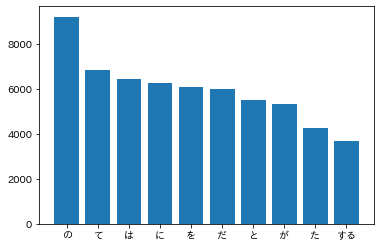

In [52]:
import matplotlib.pyplot as plt
import japanize_matplotlib

x, y = zip(*dic[:10])
plt.bar(x, y)
plt.show()

#37. 「猫」と共起頻度の高い上位10語
「猫」とよく共起する（共起頻度が高い）10語とその出現頻度をグラフ（例えば棒グラフなど）で表示せよ．

の : 391
は : 272
に : 250
を : 232
だ : 231
て : 229
と : 202
が : 180
する : 144
た : 140


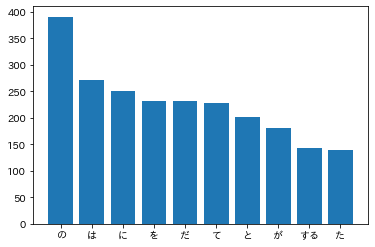

In [53]:
from collections import defaultdict

dic = defaultdict(int)
for s in sentences:
  if len([m for m in s if m['surface'] == '猫']) != 0:
   for i, m in enumerate(s):
     if m['pos'] != '記号':
       dic[m['base']] += 1

del dic['猫']
dic = sorted(dic.items(), key=lambda k: k[1], reverse=True)

for k, v in dic[:10]:
  print(k, ':', v)

x, y = zip(*dic[:10])
plt.bar(x, y)
plt.show()

#38. ヒストグラム
単語の出現頻度のヒストグラムを描け．ただし，横軸は出現頻度を表し，1から単語の出現頻度の最大値までの線形目盛とする．縦軸はx軸で示される出現頻度となった単語の異なり数（種類数）である．

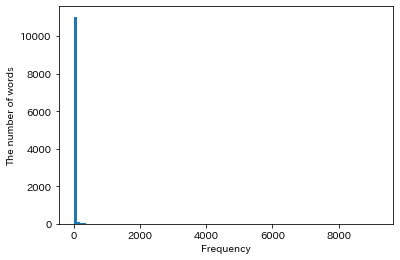

In [54]:
from collections import defaultdict

dic = defaultdict(int)
for s in sentences:
  for i, m in enumerate(s):
    if m['pos'] != '記号':
      dic[m['base']] += 1

plt.hist(dic.values(), bins=100)
plt.xlabel('Frequency')
plt.ylabel('The number of words')
plt.show()

#39. Zipfの法則
単語の出現頻度順位を横軸，その出現頻度を縦軸として，両対数グラフをプロットせよ.

In [55]:
def ranking(lst):
  idx_lst = sorted(range(len(lst)), key=lst.__getitem__)
  sorted_lst = [lst[rank] for rank in idx_lst]
  count = 0
  out_lst = [0] * len(lst)
  for i in range(len(lst)):
    count += 1
    if i == len(lst)-1 or sorted_lst[i] != sorted_lst[i+1]:
      for j in range(i-count+1, i+1):
        out_lst[idx_lst[j]] = len(lst) - (i-count+2) + 1
      count = 0
  
  return out_lst

In [56]:
from collections import defaultdict

dic = defaultdict(int)
for s in sentences:
  for i, m in enumerate(s):
    if m['pos'] != '記号':
      dic[m['base']] += 1

dic = sorted(dic.items(), key=lambda k: k[1], reverse=True)

In [57]:
dic_values = [v for (k, v) in dic]

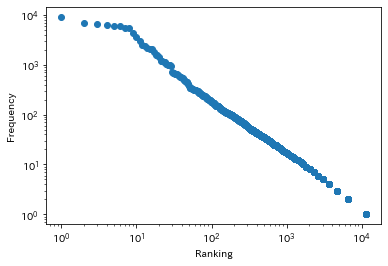

In [58]:
plt.scatter(ranking(dic_values), dic_values)
plt.xscale('log')
plt.yscale('log')
plt.xlabel('Ranking')
plt.ylabel('Frequency')
plt.show()